In [48]:
%pip install numpy pandas seaborn matplotlib # install the necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
def scatter_plot(x_: np.ndarray,
                 y_: np.ndarray,
                 name_x: str,
                 name_y: str,
                 ax=None):
    """
    scatter plot
    """
    data = pd.DataFrame(np.concatenate([x_, y_], axis=1),
                    columns=[name_x, name_y])
    if ax is None:
        sns.jointplot(data=data, x=name_x, y=name_y, kind="reg")
    else:
        sns.jointplot(data=data, x=name_x, y=name_y, kind="reg", ax=ax)

In [50]:
def performance_metrics_of_regression(labels: np.ndarray,
                                      predictions: np.ndarray) -> tuple:
    """
    Compute standard performance metrics for regression: mse and Rsquared
    """
    mse = ((predictions - labels) ** 2).mean()
    r2 = 1 - mse / (labels ** 2).mean()
    print(f'r2 = {"%.2f" % r2}, mse = {"%.2f" % mse}')

    return mse, r2

#We now experiment with random features ([Random Features for Large-Scale Kernel Machines](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf)) applied to the classic dataset from [A Comprehensive Look at the Empirical Performance of Equity Premium Prediction](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=517667) and implemented in [The Virtue of Complexity in Return Prediction](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3984925). We will also load the FRED-MD dataset from [FRED-MD](https://research.stlouisfed.org/wp/more/2015-012)

In [51]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [52]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


<Axes: xlabel='yyyymm'>

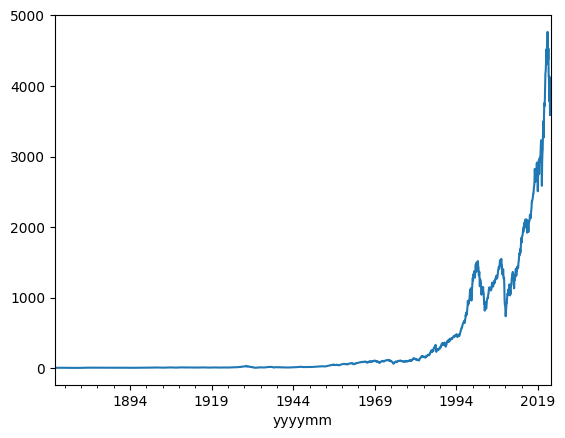

In [53]:
goyal_welch_data['Index'].plot()

<Axes: xlabel='yyyymm'>

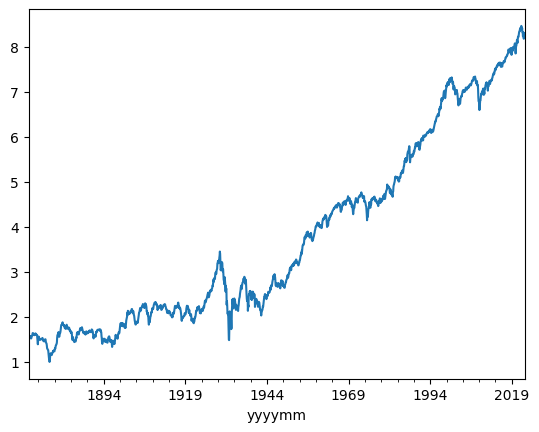

In [54]:
np.log(goyal_welch_data['Index']).plot()

In [55]:
goyal_welch_data.columns

Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw',
       'CRSP_SPvwx'],
      dtype='object')

<Axes: xlabel='yyyymm'>

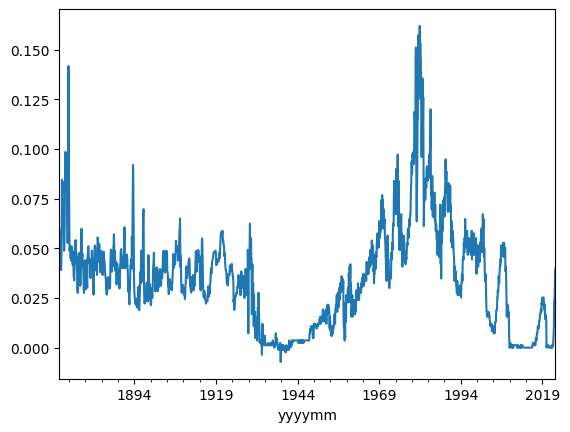

In [56]:
(12 * goyal_welch_data.Rfree).plot()

In [57]:
goyal_welch_data.tail(20)


,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
2021-05-01,4204.11,57.7878,148.5733,0.184798,0.0002,0.0296,0.0362,0.0162,0.017464,0.0000,0.008017,0.0001,0.0045,0.001496,NaN,0.006208,0.004737
2021-06-01,4297.50,57.8650,158.7600,0.184942,0.0004,0.0279,0.0344,0.0152,0.017255,0.0000,0.009291,0.0284,0.0442,0.000607,NaN,0.023682,0.022564
2021-07-01,4395.26,58.3282,164.2967,0.182650,0.0005,0.0257,0.0324,0.0132,0.016079,0.0000,0.004811,0.0305,0.0239,0.001124,NaN,0.024305,0.023309
2021-08-01,4522.68,58.7913,169.8333,0.180453,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205
2021-09-01,4307.54,59.2545,175.3700,0.188541,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152
2021-10-01,4605.38,59.6354,182.8700,0.178142,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627
2021-11-01,4567.00,60.0162,190.3700,0.185043,0.0005,0.0262,0.0328,0.0156,0.015640,0.0001,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008666
2021-12-01,4766.18,60.3971,197.8700,0.175599,0.0006,0.0265,0.0330,0.0147,0.012974,0.0000,0.003073,-0.0110,-0.0129,0.002518,NaN,0.043485,0.042285
2022-01-01,4515.55,60.9214,197.8833,0.181629,0.0015,0.0293,0.0358,0.0176,0.011640,0.0000,0.008415,-0.0227,-0.0522,0.002780,NaN,-0.052243,-0.053087


In [58]:
goyal_welch_data['returns'] = ((goyal_welch_data.Index)/ goyal_welch_data.Index.shift(1) - 1).fillna(0)

In [59]:
goyal_welch_data['returns'].describe()


count    1824.000000
mean        0.004833
std         0.047320
min        -0.299423
25%        -0.018982
50%         0.006165
75%         0.031478
max         0.422222
Name: returns, dtype: float64

In [60]:
goyal_welch_data.Rfree.describe()


count    1823.000000
mean        0.002924
std         0.002143
min        -0.000600
25%         0.001300
50%         0.002900
75%         0.004000
max         0.013500
Name: Rfree, dtype: float64

#Excess returns are defined as $R_{t+1}-r_{f,t}$ (in excess of the risk-free rate). Then, we know that, with portfolio weight $\pi_t,$ the wealth evolves as
$$
W_{t+1}\ =\ W_t(r_{f,t} + \pi_t (R_{t+1}-r_{f,t}))
$$

In [61]:
goyal_welch_data.columns

Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
       'Rfree', 'infl', 'ltr', 'corpr', 'svar', 'csp', 'CRSP_SPvw',
       'CRSP_SPvwx', 'returns'],
      dtype='object')

<Axes: xlabel='yyyymm'>

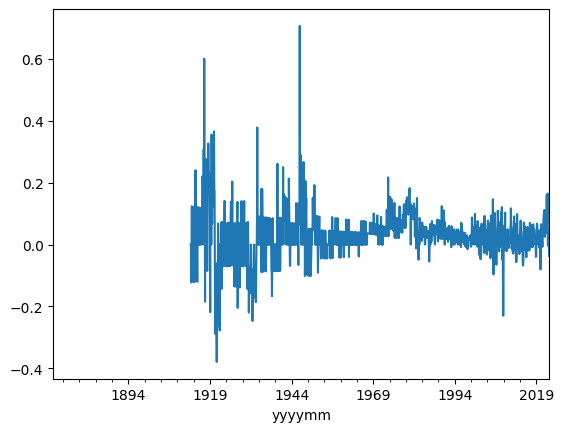

In [62]:
(12 * goyal_welch_data.infl).plot()

In [63]:
goyal_welch_data.infl.describe()


count    1319.000000
mean        0.002610
std         0.006433
min        -0.031579
25%         0.000000
50%         0.002404
75%         0.005473
max         0.058824
Name: infl, dtype: float64

In [64]:
goyal_welch_data.tail(20)



,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns
yyyymm,,,,,,,,,,,,,,,,,,
2021-05-01,4204.11,57.7878,148.5733,0.184798,0.0002,0.0296,0.0362,0.0162,0.017464,0.0000,0.008017,0.0001,0.0045,0.001496,NaN,0.006208,0.004737,0.005487
2021-06-01,4297.50,57.8650,158.7600,0.184942,0.0004,0.0279,0.0344,0.0152,0.017255,0.0000,0.009291,0.0284,0.0442,0.000607,NaN,0.023682,0.022564,0.022214
2021-07-01,4395.26,58.3282,164.2967,0.182650,0.0005,0.0257,0.0324,0.0132,0.016079,0.0000,0.004811,0.0305,0.0239,0.001124,NaN,0.024305,0.023309,0.022748
2021-08-01,4522.68,58.7913,169.8333,0.180453,0.0005,0.0255,0.0324,0.0128,0.014846,0.0000,0.002066,-0.0035,-0.0045,0.000602,NaN,0.030600,0.029205,0.028990
2021-09-01,4307.54,59.2545,175.3700,0.188541,0.0004,0.0253,0.0323,0.0137,0.015598,0.0000,0.002716,-0.0250,-0.0194,0.001393,NaN,-0.046076,-0.047152,-0.047569
2021-10-01,4605.38,59.6354,182.8700,0.178142,0.0005,0.0268,0.0335,0.0158,0.013368,0.0000,0.008308,0.0051,0.0159,0.001151,NaN,0.070510,0.069627,0.069144
2021-11-01,4567.00,60.0162,190.3700,0.185043,0.0005,0.0262,0.0328,0.0156,0.015640,0.0001,0.004913,0.0210,0.0094,0.001327,NaN,-0.007256,-0.008666,-0.008334
2021-12-01,4766.18,60.3971,197.8700,0.175599,0.0006,0.0265,0.0330,0.0147,0.012974,0.0000,0.003073,-0.0110,-0.0129,0.002518,NaN,0.043485,0.042285,0.043613
2022-01-01,4515.55,60.9214,197.8833,0.181629,0.0015,0.0293,0.0358,0.0176,0.011640,0.0000,0.008415,-0.0227,-0.0522,0.002780,NaN,-0.052243,-0.053087,-0.052585


In [65]:
goyal_welch_data.corr()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns
Index,1.000000,0.976952,0.971674,-0.586955,-0.233160,-0.151000,-0.187700,-0.217137,-0.388406,-0.256399,-0.010084,-0.034677,-0.019966,0.024068,-0.394410,0.003758,0.019214,0.030394
D12,0.976952,1.000000,0.967866,-0.566695,-0.195115,-0.089142,-0.124923,-0.156467,-0.449804,-0.226416,-0.016082,-0.010813,0.001501,0.041149,-0.591115,-0.005382,0.009796,0.024005
E12,0.971674,0.967866,1.000000,-0.552464,-0.181918,-0.100869,-0.143726,-0.160729,-0.407763,-0.214650,0.000675,-0.018821,-0.017731,0.006350,-0.520702,-0.007065,0.007905,0.021725
b/m,-0.586955,-0.566695,-0.552464,1.000000,0.199958,0.160981,0.260409,0.197314,0.034194,0.192322,0.073090,0.009947,-0.000043,0.169768,0.273217,-0.045084,-0.064466,-0.068189
tbl,-0.233160,-0.195115,-0.181918,0.199958,1.000000,0.888219,0.828238,0.901584,0.032109,0.987950,0.201720,0.053990,0.032672,-0.151561,-0.583011,-0.019120,-0.019864,-0.025131
AAA,-0.151000,-0.089142,-0.100869,0.160981,0.888219,1.000000,0.970474,0.988194,-0.082484,0.880914,0.159846,0.105842,0.101953,-0.047285,-0.650444,-0.009374,-0.007710,-0.011392
BAA,-0.187700,-0.124923,-0.143726,0.260409,0.828238,0.970474,1.000000,0.944715,-0.119387,0.824402,0.094729,0.116887,0.118228,0.074055,-0.601867,-0.011657,-0.011785,-0.016318
lty,-0.217137,-0.156467,-0.160729,0.197314,0.901584,0.988194,0.944715,1.000000,-0.061977,0.890538,0.184884,0.056213,0.054396,-0.099717,-0.657265,-0.010755,-0.010226,-0.014261
ntis,-0.388406,-0.449804,-0.407763,0.034194,0.032109,-0.082484,-0.119387,-0.061977,1.000000,0.032430,-0.055086,-0.045876,-0.042822,-0.039215,0.248873,-0.068233,-0.073075,-0.070015
Rfree,-0.256399,-0.226416,-0.214650,0.192322,0.987950,0.880914,0.824402,0.890538,0.032430,1.000000,0.177283,0.091004,0.066322,-0.122932,-0.587353,-0.016362,-0.016427,-0.032216


In [66]:
goyal_welch_data.dropna()

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns
yyyymm,,,,,,,,,,,,,,,,,,
1937-05-01,16.26,0.8100,1.1500,0.489382,0.0041,0.0333,0.0484,0.0282,0.028278,0.0006,0.006993,0.0053,0.0040,0.003593,0.003398,-0.005699,-0.011686,-0.010347
1937-06-01,15.40,0.8400,1.1700,0.504961,0.0036,0.0328,0.0493,0.0285,0.031266,0.0003,0.000000,-0.0018,0.0053,0.002984,0.004206,-0.053803,-0.057853,-0.052891
1937-07-01,16.98,0.8167,1.1867,0.464649,0.0028,0.0325,0.0491,0.0277,0.027225,0.0003,0.006944,0.0138,0.0039,0.002982,0.003630,0.098991,0.098012,0.102597
1937-08-01,16.04,0.7933,1.2033,0.481935,0.0029,0.0324,0.0492,0.0286,0.031064,0.0002,0.000000,-0.0104,-0.0017,0.002141,0.003325,-0.051183,-0.056291,-0.055359
1937-09-01,13.76,0.7700,1.2200,0.553147,0.0031,0.0328,0.0516,0.0284,0.035847,0.0004,0.006897,0.0045,0.0025,0.015821,0.003339,-0.139610,-0.143683,-0.142145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,916.07,15.8790,28.9400,0.284412,0.0162,0.0637,0.0758,0.0510,0.024748,0.0014,0.003331,0.0464,0.0452,0.009409,-0.002908,0.007061,0.005401,0.004881
2002-09-01,815.29,15.7990,30.0400,0.324555,0.0163,0.0615,0.0740,0.0480,0.029299,0.0014,0.001660,0.0417,0.0330,0.007366,-0.003213,-0.108965,-0.110421,-0.110013
2002-10-01,885.76,15.8907,29.2233,0.293437,0.0158,0.0632,0.0773,0.0508,0.025671,0.0014,0.001657,-0.0294,-0.0240,0.011590,-0.003753,0.088599,0.087103,0.086436


In [67]:
goyal_welch_data


,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx,returns
yyyymm,,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013514
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024444
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028200
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052,-0.042440
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876,-0.093396
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196,0.079863


# **Do not forget to shift the signals !!!!**

# Now comes (as usual) our favorite regression function
# Recall that we would like to compute $(zI+SS'/T)^{-1}$ for many values of $z.$ Doing this is slow because matrix inversion is slow. Instead, we will only pay the cost of matrix manipulations just once. We do this by performing the eigenvalue decomposition
$$
SS'/T\ =\ U DU'
$$
#and then use the mathematical formula
$$
(zI+SS'/T)^{-1}\ =\ U (zI+D)^{-1}U'\,.
$$
#The **estimated** regression coefficients for $y=S\beta+\epsilon$ are
$$
\hat\beta(z)\ =\ (zI+S'S/T)^{-1}S'y/T\ =\ S'(zI+SS'/T)^{-1}y/T
$$
#and we can thus rewrite it as
$$
S'(zI+SS'/T)^{-1}y/T\ =\ S'U (zI+D)^{-1}U' y/T\,.
$$
#So we proceed as follows. First, we compute
$$
\mu\ =\ U' y/T
$$
#Now, let $\delta$ be the vector of diagoal elements of $D$. Then,
$$
[(z_1I+D)^{-1}\mu, \cdots, (z_KI+D)^{-1}\mu]\ =\ [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}]*\mu
$$
#Here, $[(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}]$ is the matrix with $K$ columns and $T$ rows, because $\mu$ and $\delta$ are $T$-dimensional.


In [68]:
def ridge_regr(signals: np.ndarray,
                labels: np.ndarray,
                future_signals: np.ndarray,
                shrinkage_list: np.ndarray):
    """
    Regression is
    beta = (zI + S'S/t)^{-1}S'y/t = S' (zI+SS'/t)^{-1}y/t
    Inverting matrices is costly, so we use eigenvalue decomposition:
    (zI+A)^{-1} = U (zI+D)^{-1} U' where UDU' = A is eigenvalue decomposition,
    and we use the fact that D @ B = (diag(D) * B) for diagonal D, which saves a lot of compute cost
    :param signals: S
    :param labels: y
    :param future_signals: out of sample y
    :param shrinkage_list: list of ridge parameters
    :return:
    """
    t_ = signals.shape[0]
    p_ = signals.shape[1]
    if p_ < t_:
        # this is standard regression
        eigenvalues, eigenvectors = np.linalg.eigh(signals.T @ signals / t_)
        means = signals.T @ labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)
        betas = eigenvectors @ intermed
    else:
        # this is the weird over-parametrized regime
        eigenvalues, eigenvectors = np.linalg.eigh(signals @ signals.T / t_)
        means = labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means # this is \mu

        # now we build [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}] * \mu
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)

        tmp = eigenvectors.T @ signals # U.T @ S
        betas = tmp.T @ intermed # (S.T @ U) @ [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}] * \mu
    predictions = future_signals @ betas
    return betas, predictions

# Sometimes, data normalization can be important. We introduce a function to do it here

In [69]:
def normalize(data: np.ndarray,
              ready_normalization: dict = None,
              use_std: bool = False)->tuple:
  """

  """

  if ready_normalization is None:
      data_std = data.std(0)
      data_mean = data.mean(0)
      if use_std:
        data = (data - data_mean) / data_std # this is z-scoring of the data
      else:
        data_max = np.max(data, axis=0)
        data_min = np.min(data, axis=0)
  else:
      data_std = ready_normalization['std']
      data_mean = ready_normalization['mean']
      if use_std:
        data = (data - data_mean) / data_std # this is z-scoring of the data
      else:
        data_max = ready_normalization['max']
        data_min = ready_normalization['min']
  if not use_std:
    data = data - data_min
    data = data/(data_max - data_min)
    data = data - 0.5
  normalization = {'std': data_std,
                   'mean': data_mean,
                    'max': data_max,
                    'min': data_min}
  return data, normalization

# Now we compute managed returns $\pi_t(z) \cdot R_{t+1}.$ Because we are predicting the market, we are "timing the market" and hence we will also call them "market timing returns"

In [70]:
def sharpe_ratio(x):
  # We are computing the ANNUALIZED SHARPE RATIO, hence we need to multiply by sqrt(12)
  return np.round(np.sqrt(12) * x.mean(0) / x.std(0), 2)

# We now investigate the statistical significance of our strategy performance relative to that of the two benchmarks: the market and the simple, linear strategy. To this end, we run the following regression
$$
R_{t+1}^{simple\ linear}\ =\ \alpha\ +\ \beta R_{t+1}^{market}
$$
#We would like to see a large positive t-statistic for the $\alpha$ coefficient

In [71]:
%pip install statsmodels  # install the necessary packages
import statsmodels.api as sm

def regression_with_tstats(predicted_variable, explanatory_variables):
    x_ = explanatory_variables
    x_ = sm.add_constant(x_)
    y_ = predicted_variable
    # Newey-West standard errors with maxlags
    z_ = x_.copy().astype(float)
    result = sm.OLS(y_.values, z_.values).fit(cov_type='HAC', cov_kwds={'maxlags': 10})
    try:
        tstat = np.round(result.summary2().tables[1]['z'], 1)  # alpha t-stat (because for 'const')
        tstat.index = list(z_.columns)
    except:
        print(f'something is wrong for t-stats')
    return tstat


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# **NOW COME THE RANDOM FEATURES**

#The scale of random weights entering random features is very important.

#There are two equivalent ways to control the scale of your linear random features. One is to generate $\omega\sim N(0,1)$ and then use $\gamma\cdot \omega$ for some $\gamma\in \mathbb R$. This $\gamma$ controls the scale of the your features. Another way is to directly sample $\omega\sim N(0, \gamma^2).$ Mathematically, this is based on the important observation that if $\omega\sim N(0,1)$, then $\gamma\omega\sim N(0, \gamma^2).$

#The intuition is based on the Taylor approximation.  We have $h(\gamma \cdot \omega'x) \approx h(0)+h'(0) \gamma \omega' x$ when $\gamma$ is small enough. That is, our non-linear random features become approximately linear. **Thus, the bigger $\gamma$ is, the more non-linear the features are.**

#**This scale is also important for neural networks, and is pinned down through initialization!**

In [72]:
import statsmodels.api as sm

def regression_with_tstats(predicted_variable, explanatory_variables):
    x_ = explanatory_variables
    x_ = sm.add_constant(x_)
    y_ = predicted_variable
    # Newey-West standard errors with maxlags
    z_ = x_.copy().astype(float)
    result = sm.OLS(y_.values, z_.values).fit(cov_type='HAC', cov_kwds={'maxlags': 10})
    try:
        tstat = np.round(result.summary2().tables[1]['z'], 1)  # alpha t-stat (because for 'const')
        tstat.index = list(z_.columns)
    except:
        print(f'something is wrong for t-stats')
    return tstat

# We now investigate the statistical significance of our strategy performance relative to that of the two benchmarks: the market and the simple, linear strategy. To this end, we run the following regression
$$
R_{t+1}^{complex}\ =\ \alpha\ +\ \beta_1 R_{t+1}^{market}\ +\ \beta_2 R_{t+1}^{simple\ linear}
$$
#We would like to see a large positive t-statistic for the $\alpha$ coefficient

# SPY ticker 

In [73]:
spy_monthly_returns = pd.read_csv('../macro_data/spy_monthly_returns.csv', index_col=0)

spy_monthly_returns.index = pd.to_datetime(spy_monthly_returns.index, format='%Y-%m-%d')


In [74]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > spy_monthly_returns.index.min() else spy_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < spy_monthly_returns.index.max() else spy_monthly_returns.index.max()

start_date, end_date

(Timestamp('1993-03-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [75]:
filtered_spy_monthly_returns = spy_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = spy_monthly_returns['SPY'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_13647/1887622125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = spy_monthly_returns['SPY'] - filtered_goyal_welch_data['Rfree']


yyyymm
1993-03-01    0.008168
1993-04-01    0.020000
1993-05-01   -0.027789
1993-06-01    0.024470
1993-07-01    0.001207
                ...   
2022-08-01    0.090188
2022-09-01   -0.042702
2022-10-01   -0.094746
2022-11-01    0.078375
2022-12-01    0.052292
Name: excess_returns, Length: 358, dtype: float64

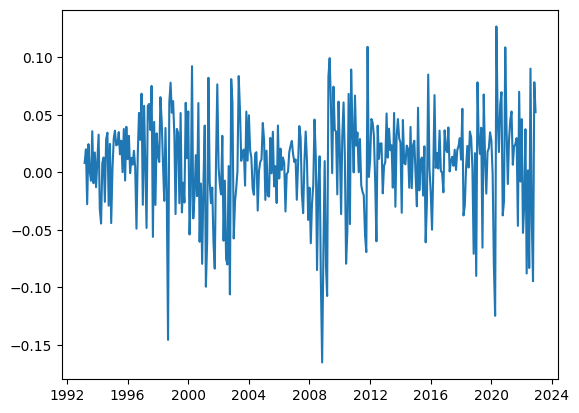

In [76]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

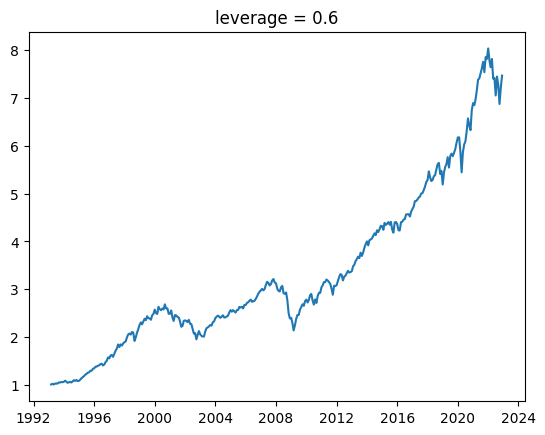

In [77]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [78]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [79]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
1993-03-01  0.000000  0.000000  0.000000  0.333614  0.0295  0.0758  0.0815   
1993-04-01  0.974583  1.001178  0.991431  0.334350  0.0287  0.0746  0.0814   
1993-05-01  1.022717  1.001169  0.991357  0.324882  0.0296  0.0743  0.0821   
1993-06-01  1.000755  1.001175  0.991282  0.325931  0.0307  0.0733  0.0807   
1993-07-01  0.994673  0.999896  1.018624  0.323777  0.0304  0.0717  0.0793   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [80]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((358, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [81]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
1993-03-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
1993-04-01,0.000000,0.000000,0.000000,0.333614,0.0295,0.0758,0.0815,0.0702,0.037106,0.0025,0.000000,0.0021,0.0025,0.001005
1993-05-01,0.974583,1.001178,0.991431,0.334350,0.0287,0.0746,0.0814,0.0701,0.039813,0.0024,0.003494,0.0072,0.0052,0.001005
1993-06-01,1.022717,1.001169,0.991357,0.324882,0.0296,0.0743,0.0821,0.0701,0.040255,0.0022,0.002786,0.0047,0.0020,0.000817
1993-07-01,1.000755,1.001175,0.991282,0.325931,0.0307,0.0733,0.0807,0.0668,0.041154,0.0025,0.001389,0.0449,0.0293,0.000574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [82]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-02-01     -0.064151     -0.063679     -0.059950     -0.040670   
2008-03-01     -0.036595     -0.036563     -0.036237     -0.030154   
2008-04-01     -0.012441     -0.013046     -0.016980     -0.023773   
2008-05-01      0.047686      0.047927      0.048962      0.035400   
2008-06-01      0.017728      0.016769      0.010441     -0.005297   
...                  ...           ...           ...           ...   
2022-08-01      0.083508      0.082386      0.074100      0.039513   
2022-09-01     -0.045414     -0.044550     -0.038419     -0.013665   
2022-10-01     -0.100597     -0.098631     -0.084923     -0.037824   
2022-11-01      0.063826      0.062860      0.055492      0.025705   
2022-12-01      0.039521      0.040085      0.043508      0.036929   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [83]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,1.053777,1.036722,0.911419,0.452032,0.084336,0.011520,0.002260,0.000340,0.000036,3.658443e-06
D12,-0.854067,-0.827468,-0.656172,-0.258246,-0.040545,-0.002020,0.001062,0.000239,0.000027,2.685201e-06
E12,-0.101634,-0.111659,-0.163109,-0.133601,-0.024134,-0.000755,0.001022,0.000218,0.000024,2.438886e-06
b/m,0.007651,0.007598,0.005774,-0.006479,-0.011584,-0.002363,0.000255,0.000084,0.000010,9.744728e-07
tbl,-0.011393,-0.011405,-0.011477,-0.012143,-0.000067,0.001706,0.000647,0.000107,0.000012,1.162045e-06
AAA,-0.176611,-0.163147,-0.104361,-0.044262,-0.015398,-0.001846,0.000477,0.000122,0.000014,1.389401e-06
BAA,0.177372,0.158801,0.062908,-0.047416,-0.021121,-0.002452,0.000496,0.000133,0.000015,1.514065e-06
lty,0.004766,0.008076,0.033928,0.057347,0.008587,0.000930,0.000666,0.000131,0.000014,1.453270e-06
ntis,0.012802,0.012636,0.012080,0.012816,0.005460,-0.000309,0.000209,0.000057,0.000006,6.479866e-07
Rfree,0.012388,0.011787,0.009628,0.016129,0.008141,0.002151,0.000533,0.000080,0.000008,8.542001e-07


In [84]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-02-01      0.003962      0.003933      0.003703      0.002512   
2008-03-01      0.001008      0.001007      0.000998      0.000831   
2008-04-01      0.000134      0.000140      0.000182      0.000255   
2008-05-01      0.002187      0.002198      0.002246      0.001624   
2008-06-01      0.000238      0.000225      0.000140     -0.000071   
...                  ...           ...           ...           ...   
2022-08-01      0.007531      0.007430      0.006683      0.003564   
2022-09-01      0.001939      0.001902      0.001641      0.000584   
2022-10-01      0.009531      0.009345      0.008046      0.003584   
2022-11-01      0.005002      0.004927      0.004349      0.002015   
2022-12-01      0.002067      0.002096      0.002275      0.001931   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [85]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [86]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

Text(0.5, 1.0, 'SR=[0.59 1.76 1.76 1.79 1.53 0.97 0.93 1.11 1.12 1.12 1.12]')

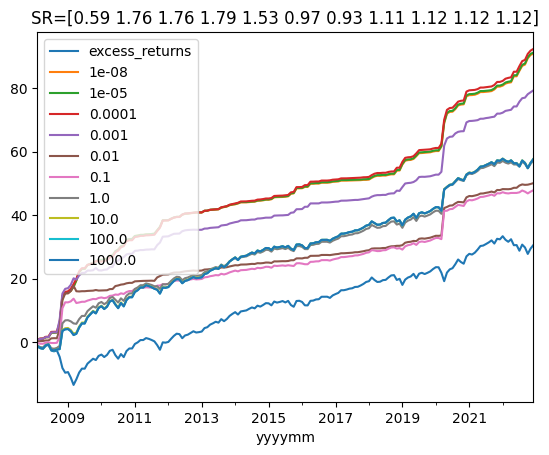

In [87]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

In [88]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const             2.7
excess_returns    1.3
Name: z, dtype: float64


In [89]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [90]:
random_features.shape

(358, 100000)

In [91]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-02-01     -0.010265     -0.021345     -0.045998     -0.062447   
2008-03-01      0.020883      0.006754     -0.025238     -0.041933   
2008-04-01      0.089582      0.078545      0.032608     -0.001381   
2008-05-01      0.059762      0.042876      0.032190      0.029835   
2008-06-01      0.004187      0.011238      0.005236      0.002938   
...                  ...           ...           ...           ...   
2022-08-01      0.212350      0.170612      0.104251      0.062969   
2022-09-01     -0.036832     -0.052669     -0.064528     -0.062958   
2022-10-01     -0.085177     -0.104320     -0.121364     -0.112963   
2022-11-01      0.084131      0.065398      0.044357      0.047658   
2022-12-01      0.060691      0.039026      0.020611      0.022797   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

Text(0.5, 1.0, 'sr=excess_returns    0.59\n0.0               1.76\n0.00001           1.76\n0.0001            1.79\n0.001             1.53\n0.01              0.97\n0.1               0.93\n1.0               1.11\n10.0              1.12\n100.0             1.12\n1000.0            1.12\n1e-08_complex     1.10\n1e-05_complex     1.21\n0.0001_complex    1.32\n0.001_complex     1.57\n0.01_complex      2.34\n0.1_complex       2.66\n1.0_complex       2.62\n10.0_complex      2.48\n100.0_complex     1.61\n1000.0_complex    1.42\nmean              2.05\ndtype: float64')

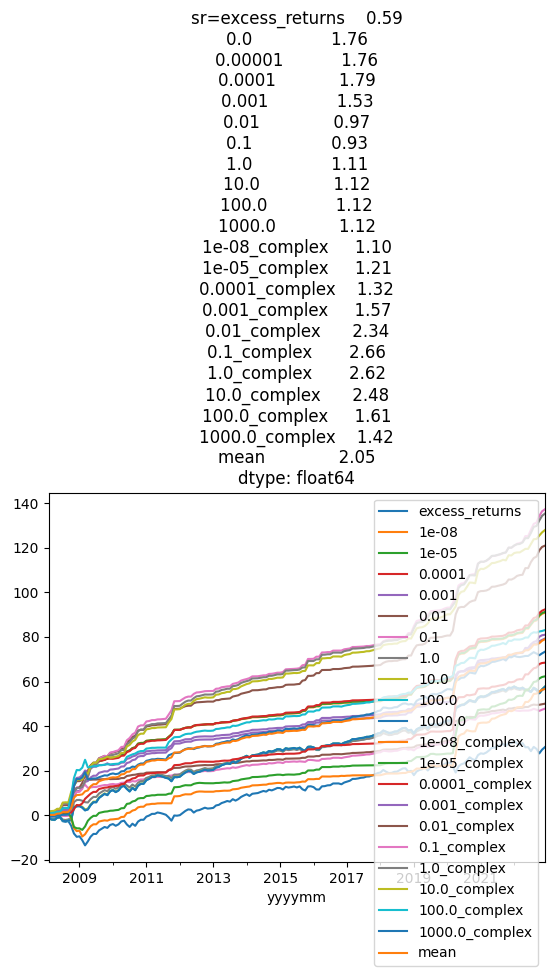

In [92]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [93]:
cleaned_data.corr()[0.0001]

Index             0.033849
D12              -0.210797
E12              -0.242273
b/m               0.055398
tbl               0.022917
AAA               0.111710
BAA               0.278883
lty              -0.012108
ntis             -0.198651
Rfree             0.017260
infl             -0.375436
ltr               0.180238
corpr             0.208334
svar              0.449640
CRSP_SPvw         0.035832
CRSP_SPvwx        0.034078
returns           0.033849
excess_returns   -0.262660
0.0               0.994984
0.00001           0.996188
0.0001            1.000000
0.001             0.966148
0.01              0.859398
0.1               0.808612
1.0               0.653716
10.0              0.555900
100.0             0.542740
1000.0            0.541384
1e-08_complex     0.294205
1e-05_complex     0.404587
0.0001_complex    0.759505
0.001_complex     0.897702
0.01_complex      0.855765
0.1_complex       0.656675
1.0_complex       0.672999
10.0_complex      0.686060
100.0_complex     0.770872
1

In [94]:
tstats = regression_with_tstats(predicted_variable=tmp['0.001_complex'], explanatory_variables=tmp[['excess_returns', 0.0001]])
print(tstats)

const             0.2
excess_returns   -1.6
0.0001            4.7
Name: z, dtype: float64
